# The eigen-matters of Rabi Hamiltonian



In [1]:
# front matter
import numpy as np
import matplotlib.pyplot as plt
import pickle

#If your screen has retina display this will increase resolution of plots
%config InlineBackend.figure_format = 'retina'

## Function defination

In [2]:
# Basic constants

#define pauli matrixes
S0 = np.array([[1, 0], [0, 1]])
S1 = np.array([[0, 1], [1, 0]])
S3 = np.array([[1, 0], [0, -1]])

# Define the grid range
XMin=-50
XMax=50
N=2000 

# Initialize T and X matrices
X=np.linspace(XMin, XMax, N)
X2=np.linspace(XMin, XMax, 2*N)
dx = X[1] - X[0]

# initial and final conditions
w0=0.35
w1=1

# how many states you want to involve
n=100

### Eigen matters

$H=\frac{p^2}{2}+\frac{(\omega x)^2}{2}+a*x\sigma_x+b*\sigma_z$

In [3]:
def Eigen_cal(w,a,b):
    V = np.zeros((N, N))
    
    # define hamiltonian
    if w==0:
        V= np.diag(0.5*(w0*X)**2)    
    elif w == 1:
        V= np.diag(0.5*(w1*X)**2) 

    # define hamiltonian
    T = np.diag(np.ones(N), 0)/(dx**2) - 0.5 * np.diag(np.ones((N-1)), 1)/(dx**2) - 0.5 * np.diag(np.ones((N-1)), -1)/(dx**2)
    H = np.kron(T,S0)+ np.kron(V,S0)+a*np.kron(np.diag(X),S1)+b*np.kron(np.eye(N),S3)
    
    # calculate eigen matters
    Eigenvalue_0, Eigenfunc_0 = np.linalg.eig(H)  
    
    # arrange by Eigenvalues
    idx_sorted = np.argsort(Eigenvalue_0) 
    Eigenvalue, Eigenfunc = Eigenvalue_0[idx_sorted], Eigenfunc_0[:, idx_sorted]
    
    return Eigenvalue,Eigenfunc

In [4]:
def Eigen_nor(w,a,b):
    Eigen_val, Eigen_func = Eigen_cal(w, a, b)
    E_arr=[]
    Psi_arr=[]
    for v in range(n):
        Psix_0 = Eigen_func[:,v]
        normal_0 = np.sqrt(sum(abs(Psix_0)**2))
        Psix_0 = Psix_0/normal_0

        Psi_arr.append(Psix_0)
        E_arr.append(Eigen_val[v])
    return E_arr, Psi_arr

## Store results

In [5]:
E_store = {}
psi_store = {}
for w in [0, 1]:
    for a in [0,  0.25, 0.5, 0.75, 1, 5]:
        for b in [0,  0.25, 0.5, 0.75, 1, 5]:
            key = (w, a, b)
            E_value, psi_value = Eigen_nor(w,a,b)
            E_store[key] = E_value
            psi_store[key] = psi_value

with open("E.pickle", "wb") as f0:
    pickle.dump(E_store, f0)

with open("psi.pickle", "wb") as f1:
    pickle.dump(psi_store, f1)

## Check out

In [6]:
# Read data
with open("psi.pickle", "rb") as f0:
    psi = pickle.load(f0)
with open("E.pickle", "rb") as f1:
    E = pickle.load(f1)

In [7]:
# psi Key ranges
keys = list(psi.keys())
name=['w','a','b']
for i in range(3):
    chars = [key[i] for key in keys]
    chars = list(set(chars))
    chars.sort()
    print(f"{name[i]}: {chars}")

w: [0, 1]
a: [0, 0.25, 0.5, 0.75, 1, 5]
b: [0, 0.25, 0.5, 0.75, 1, 5]


/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


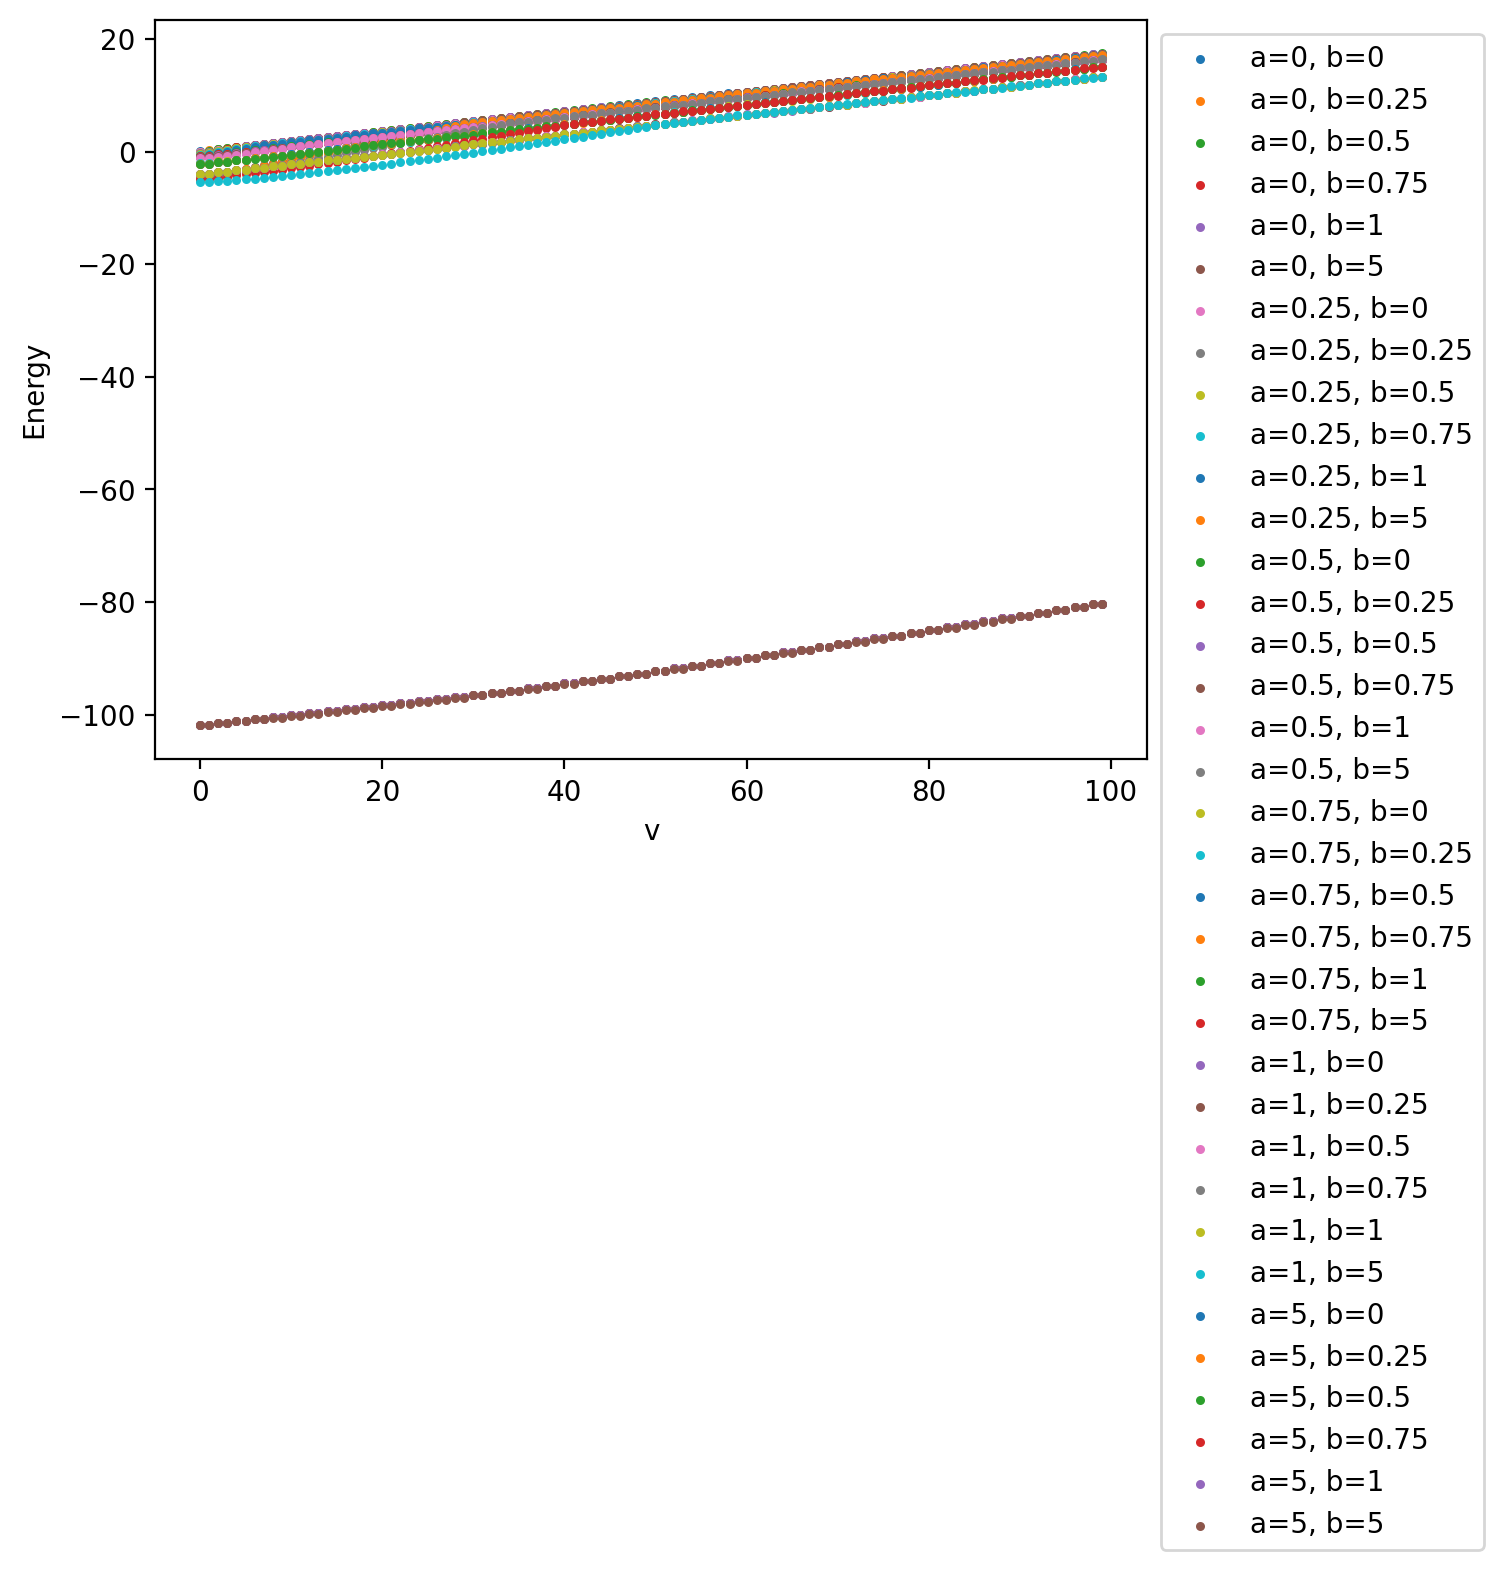

In [8]:
a_values = [0,  0.25, 0.5, 0.75, 1, 5]
b_values = [0,  0.25, 0.5, 0.75, 1, 5]
v_values = list(range(n))

fig, ax = plt.subplots()

for a in a_values:
    for b in b_values:
        values = [E[0, a, b][v] for v in v_values]
        points = zip(v_values, values)
        ax.scatter(*zip(*points), label=f'a={a}, b={b}',s=5)

ax.set_xlabel('v')
ax.set_ylabel('Energy')
# ax.set_title('First 60 eigenvalues')

ax.legend(bbox_to_anchor=(1, 1))

plt.show()

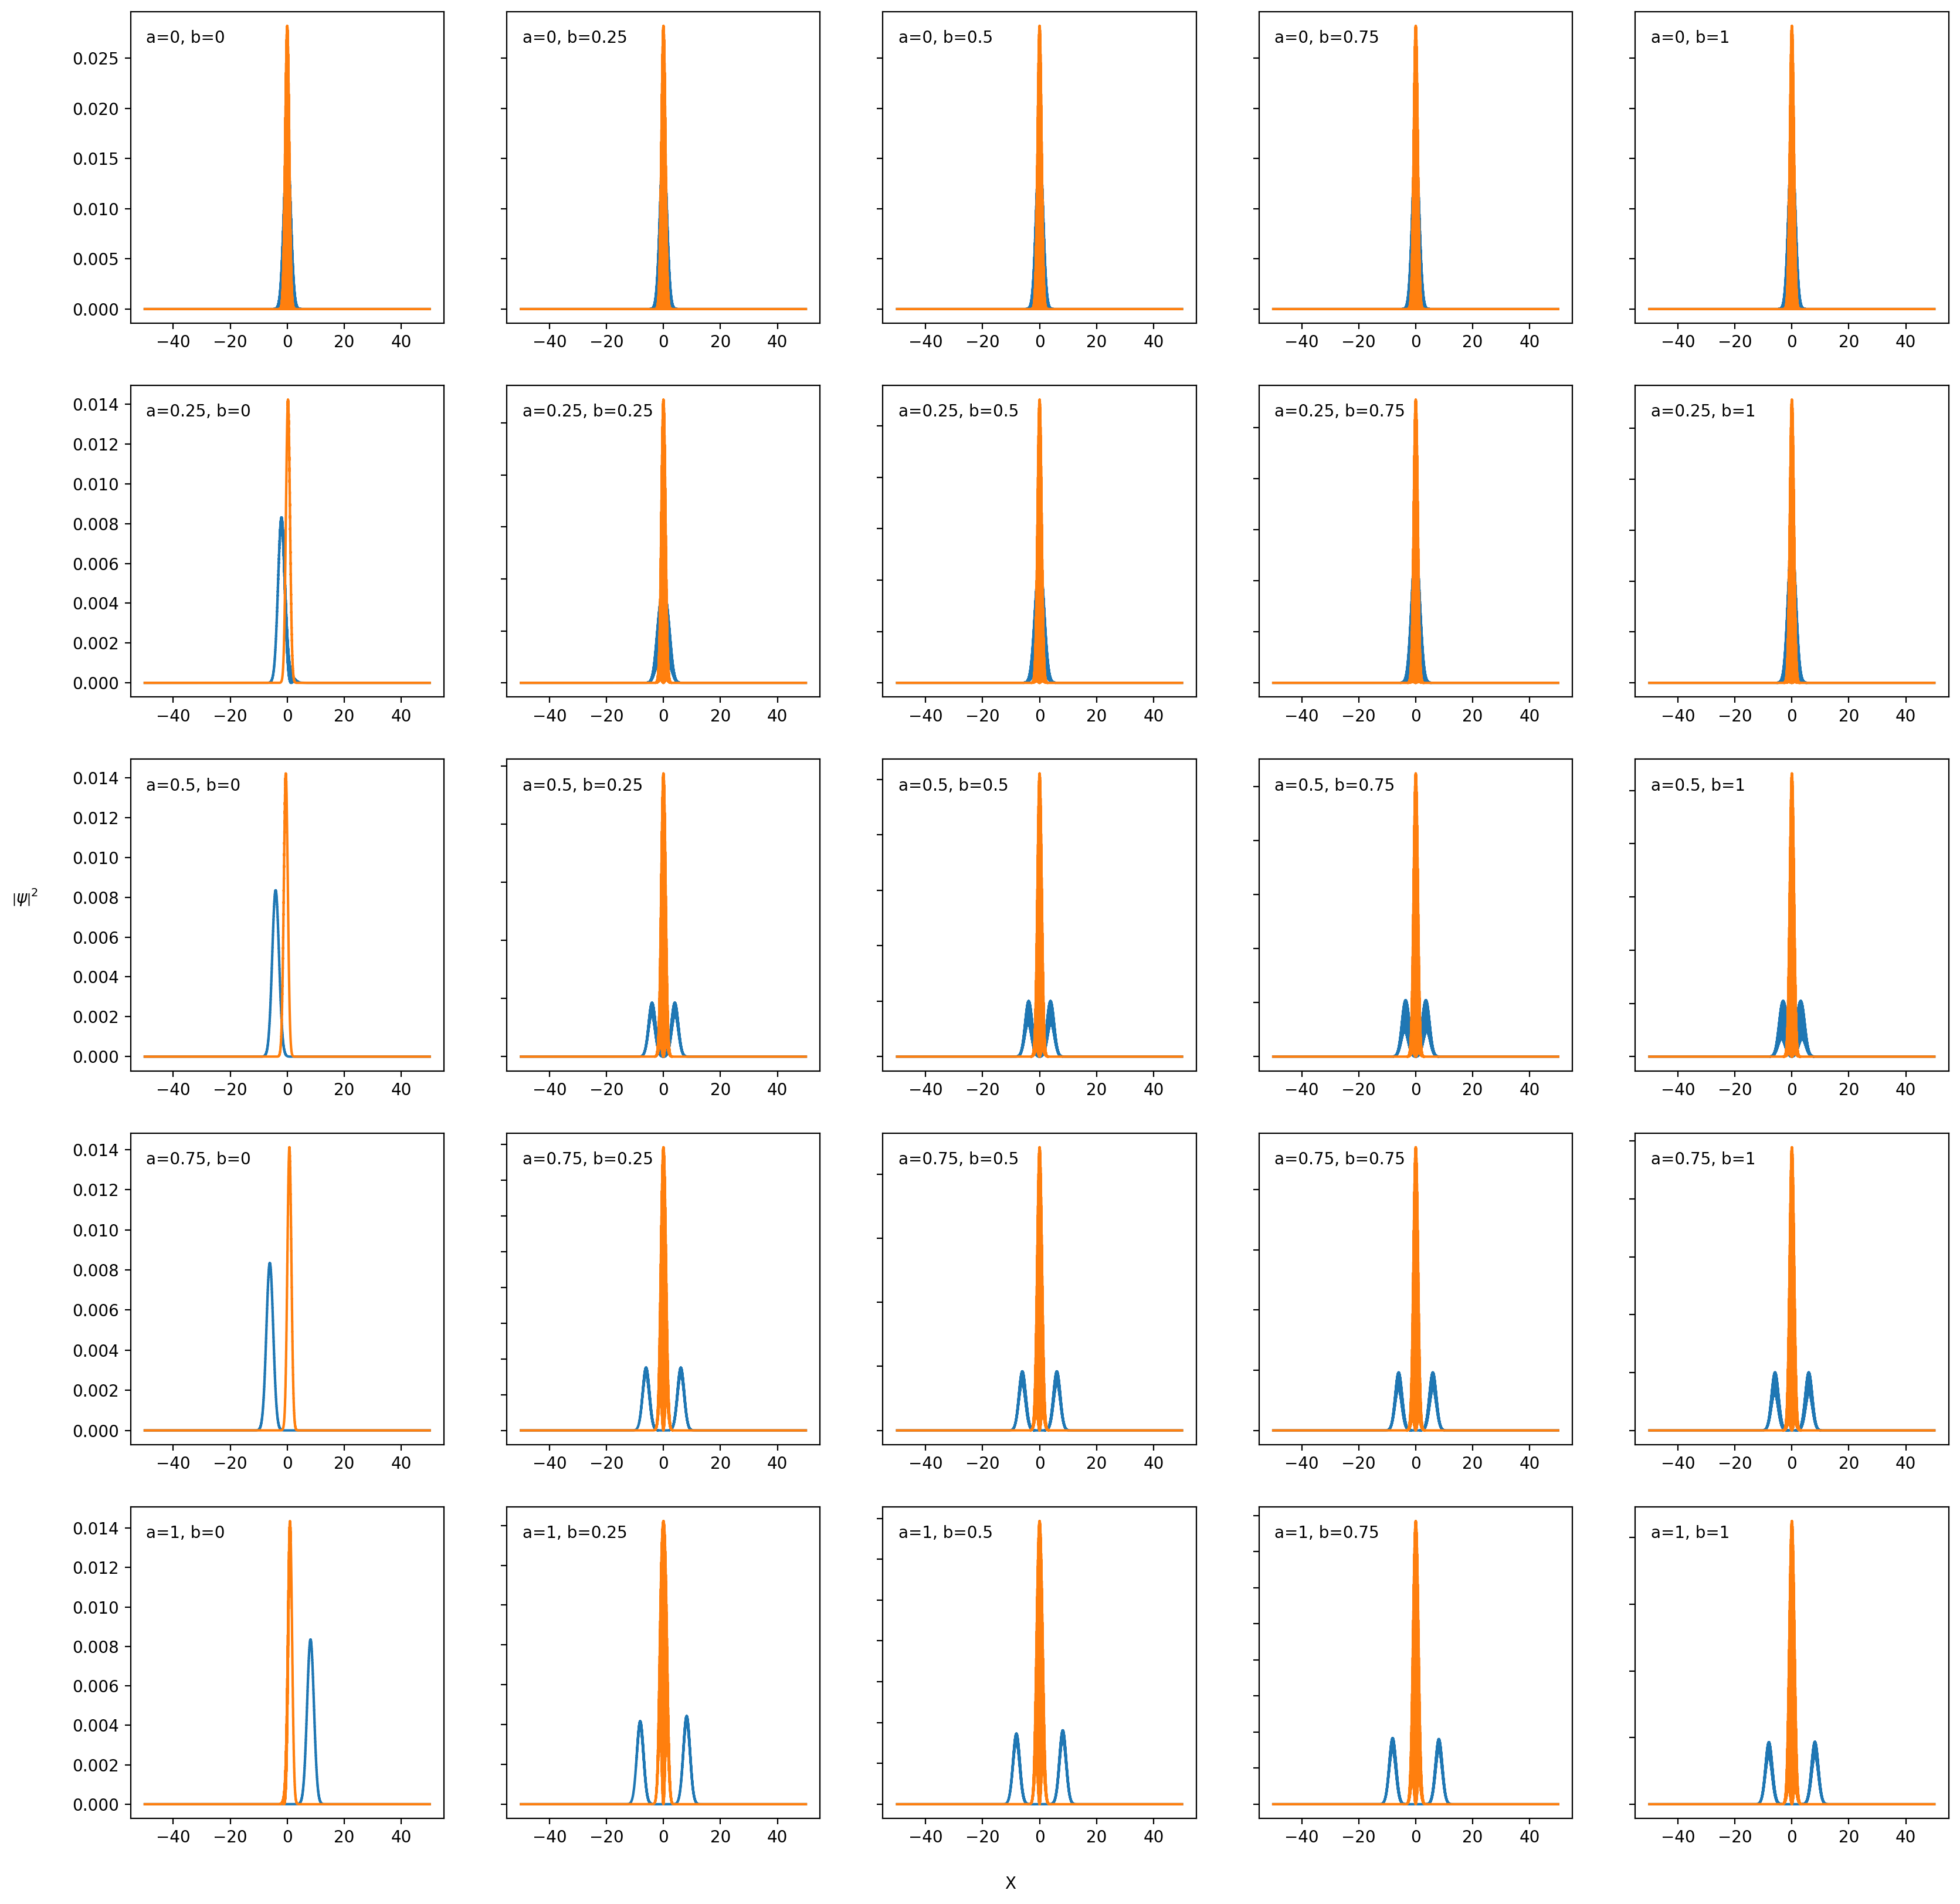

In [9]:
# spin up
def plot_graph(ax, a, b, v):
    ax.plot(X2, np.abs(psi[0,a,b][v])**2) 
    ax.plot(X2, np.abs(psi[1,a,b][v])**2)
    ax.text(0.05, 0.9, f'a={a}, b={b}', transform=ax.transAxes)

fig, axs = plt.subplots(5, 5, figsize=(20, 20))
    
list=[0,0.25,0.5,0.75,1]
for i in range(5):
    for j in range(5):
        a = list[i]
        b = list[j]
        plot_graph(axs[i, j], a, b, 0)
        if j > 0: # remove y-axis labels for all subplots except the leftmost column
            axs[i, j].set_yticklabels([])
    # axs[i, 0].set_ylabel('$\\left|\\psi\\right|^2$')

fig.text(0.5, 0.08, 'X', ha='center')
fig.text(0.08, 0.5, '$\\left|\\psi\\right|^2$', ha='center')


plt.show()

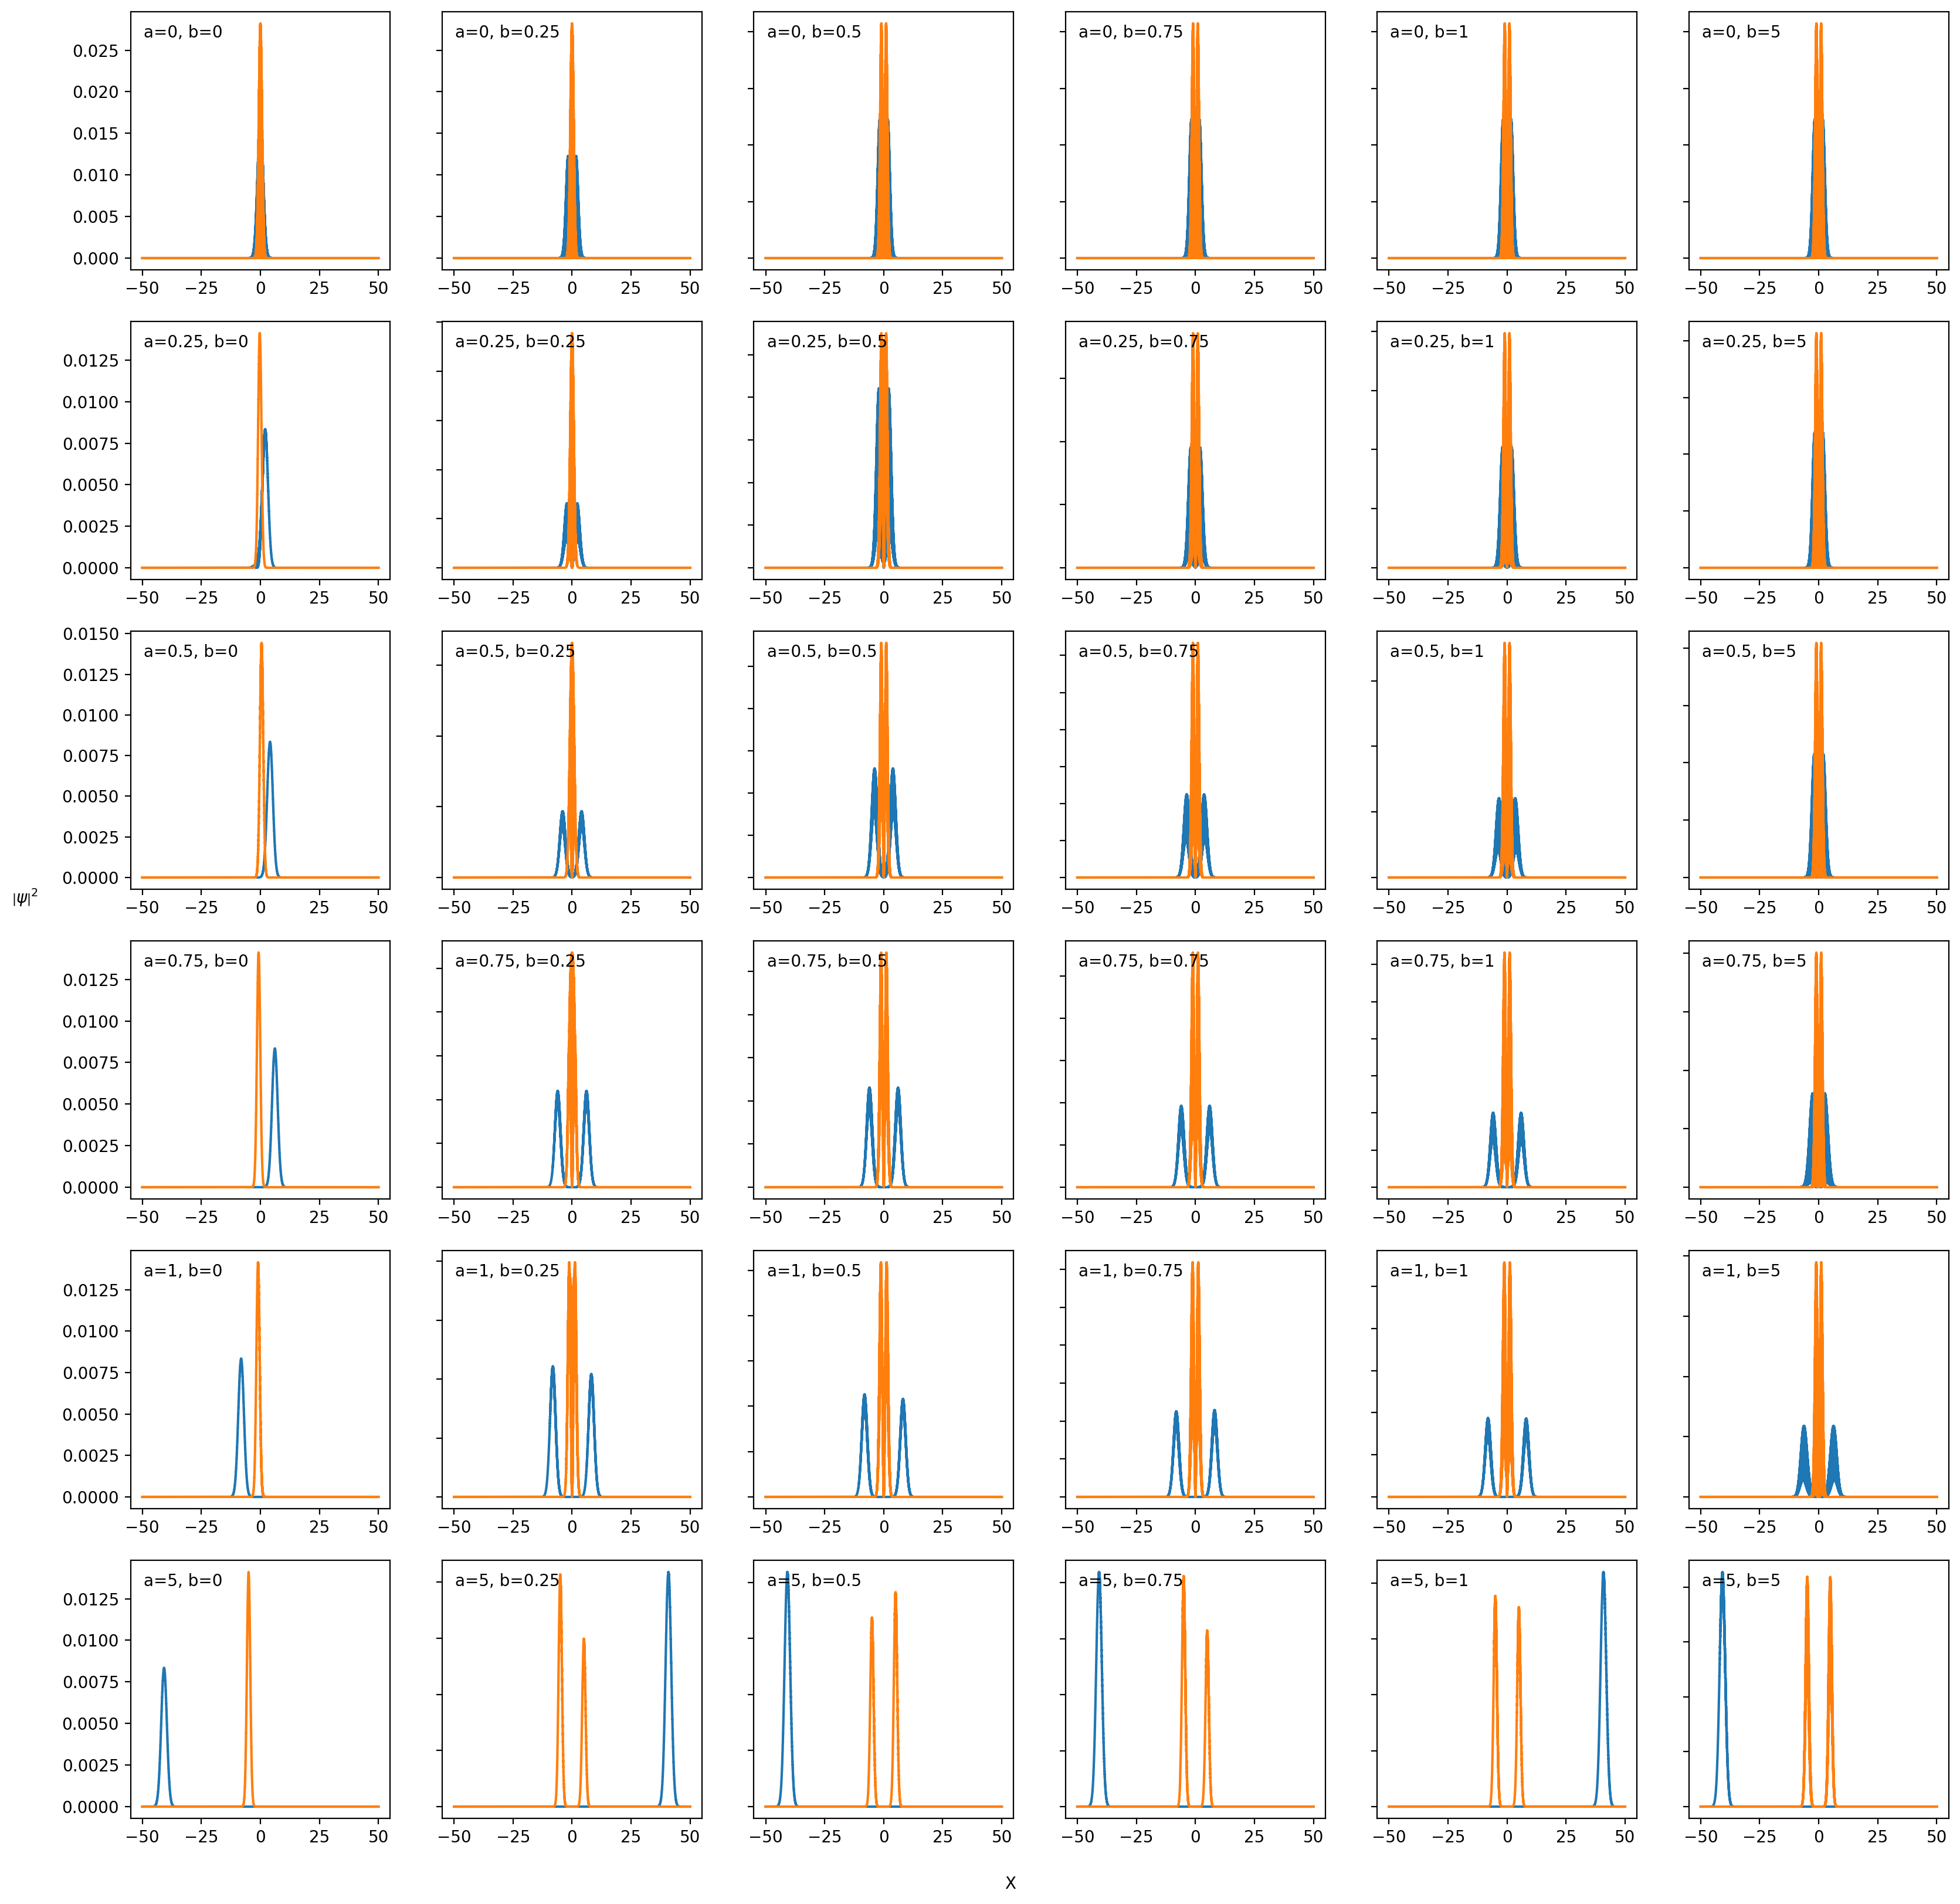

In [11]:
# spin up
def plot_graph(ax, a, b, v):
    ax.plot(X2, np.abs(psi[0,a,b][v])**2) 
    ax.plot(X2, np.abs(psi[1,a,b][v])**2)
    ax.text(0.05, 0.9, f'a={a}, b={b}', transform=ax.transAxes)

fig, axs = plt.subplots(6, 6, figsize=(20, 20))

list=[0,0.25,0.5,0.75,1,5]
for i in range(6):
    for j in range(6):
        a = list[i]
        b = list[j]
        plot_graph(axs[i, j], a, b, 1)
        if j > 0: # remove y-axis labels for all subplots except the leftmost column
            axs[i, j].set_yticklabels([])
    # axs[i, 0].set_ylabel('$\\left|\\psi\\right|^2$')

fig.text(0.5, 0.08, 'X', ha='center')
fig.text(0.08, 0.5, '$\\left|\\psi\\right|^2$', ha='center')


plt.show()